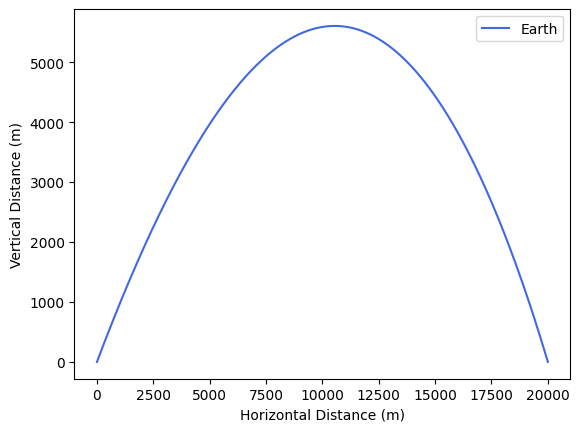

Earth:
Distance: 20006.74 meters
Initial Velocity: 504.5 m/s
Theta Angle: 45 degrees
Projectile Mass: 7000 kg
Max Height: 5606.05 meters




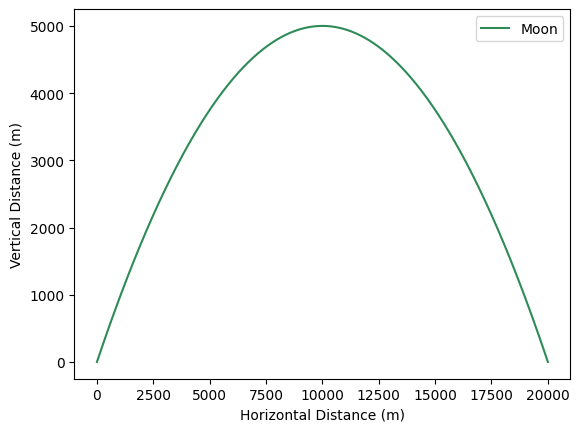

Moon:
Distance: 20001.37 meters
Initial Velocity: 180 m/s
Theta Angle: 45 degrees
Projectile Mass: 7000 kg
Max Height: 5000.44 meters




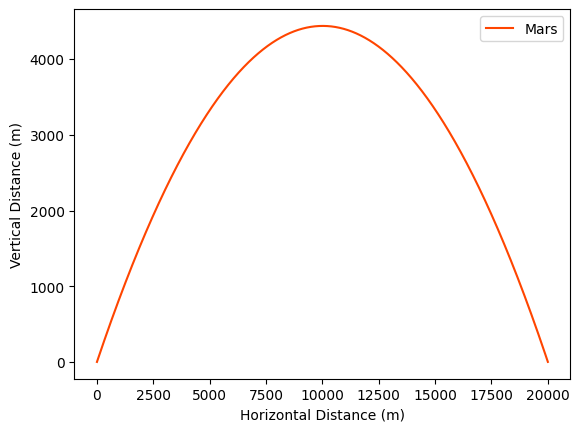

Mars:
Distance: 20012.84 meters
Initial Velocity: 273.5 m/s
Theta Angle: 41.5 degrees
Projectile Mass: 5000 kg
Max Height: 4438.06 meters




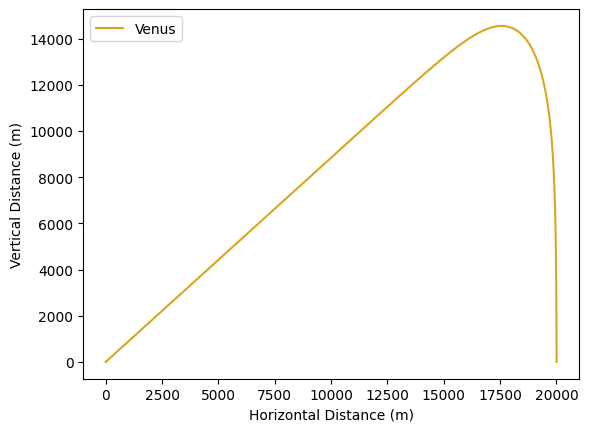

Venus:
Distance: 20005.04 meters
Initial Velocity: 700000 m/s
Theta Angle: 41.5 degrees
Projectile Mass: 15925 kg
Max Height: 14548.95 meters




In [2]:
import numpy as np  # Import the NumPy library
import matplotlib.pyplot as plt  # Import the matplotlib library for plotting
from scipy.constants import G  # Import the gravitational constant

# Define constants
x_f = 2e4  # Minimum probe distance (m)
r = 1.2  # Radius of probe (m)
Cd = 0.04  # Coefficient of drag
A = np.pi * r**2  # Cross-sectional area of the probe
N = 100000  # Number of steps to take
tau = 200.  # Total time for simulation (in seconds)
h = tau / float(N - 1)  # Time step
times = np.arange(0, tau + h, h)  # Array of time points

def accel(M, R):
    g = G * M / R**2  # Calculate gravitational acceleration
    return g

def rk4(y, t, h, derivs, grav, rho, m):
    # Runge-Kutta 4th order integration for motion
    k1 = h * derivs(y, t, grav, rho, m)
    k2 = h * derivs(y + 0.5 * k1, t + 0.5 * h, grav, rho, m)
    k3 = h * derivs(y + 0.5 * k2, t + 0.5 * h, grav, rho, m)
    k4 = h * derivs(y + k3, t + h, grav, rho, m)
    y_next = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6  # Update the state
    return y_next

# Define characteristics for Earth, Moon, Mars, and Venus
celestial_bodies = [
    {"name": "Earth", "M": 5.97e24, "R": 6.38e6, "rho": 1.204, "v_i": 504.5, "theta": 45, "color": 'royalblue', "mass": 7000},
    {"name": "Moon", "M": 7.348e22, "R": 1.74e6, "rho": 0, "v_i": 180, "theta": 45, "color": 'seagreen', "mass": 7000},
    {"name": "Mars", "M": 6.39e23, "R": 3.4e6, "rho": 0.02, "v_i": 273.5, "theta": 41.5, "color": 'orangered', "mass": 5000},
    {"name": "Venus", "M": 4.867e24, "R": 6.05e6, "rho": 65, "v_i": 700000, "theta": 41.5, "color": 'goldenrod', "mass": 15925}
]

def motion(z, t, grav, rho, m):
    z_p = np.zeros(4)
    v_mag = np.sqrt(z[1]**2 + z[3]**2)  # Calculate the velocity magnitude
    z_p[0] = z[1]
    z_p[1] = -0.5 * A * Cd * rho * v_mag * z[1] / m  # Calculate horizontal acceleration
    z_p[2] = z[3]
    z_p[3] = -grav - 0.5 * A * Cd * rho * v_mag * z[3] / m  # Calculate vertical acceleration
    return z_p

# Initialize a list to store the results
results = []

# Loop through the celestial bodies and store the results
for body in celestial_bodies:
    xmax = 0
    grav = accel(body["M"], body["R"])  # Calculate gravitational acceleration
    rho = body["rho"]
    v_i = body["v_i"]  # Initial velocity
    theta = body["theta"]  # Launch angle
    color = body["color"]
    mass = body["mass"]

    x_0, y_0 = 0, 0
    v_x0, v_y0 = v_i * np.cos(np.radians(theta)), v_i * np.sin(np.radians(theta))  # Initial horizontal and vertical velocities

    states_rk4 = np.zeros((N, 4))
    states_rk4[0, :] = [x_0, v_x0, y_0, v_y0]  # Set initial state

    for j in range(0, N - 1):
        states_rk4[j + 1, :] = rk4(states_rk4[j, :], times[j], h, motion, grav, rho, mass)  # Run RK4 integration
        if states_rk4[j + 1, 2] <= 0:  # If the probe hits the ground
            states_rk4 = states_rk4[:j, :]  # Remove extraneous rows
            xmax = states_rk4[-1, 0]  # Record the horizontal distance at impact
            break

    results.append({"name": body["name"], "trajectory": states_rk4, "initial_velocity": v_i, "color": color, "theta": theta, "mass": mass})

# Plot the trajectories and save figures
for result in results:
    trajectory = result["trajectory"]
    name = result["name"]
    initial_velocity = result["initial_velocity"]
    color = result["color"]
    theta = result["theta"]
    mass = result["mass"]

    plt.figure()
    plt.plot(trajectory[:, 0], trajectory[:, 2], color=color, label=name)  # Add label for legend
    plt.xlabel("Horizontal Distance (m)")
    plt.ylabel("Vertical Distance (m)")
    plt.legend()  # Display the legend
    plt.savefig(f"{name}_trajectory.png")  # Save the figure
    plt.show()

    distance = trajectory[-1, 0]  # Calculate the horizontal distance at impact
    max_height = max(trajectory[:, 2])  # Find the maximum height

    print(f"{name}:")
    print(f"Distance: {distance:.2f} meters")
    print(f"Initial Velocity: {initial_velocity} m/s")
    print(f"Theta Angle: {theta} degrees")
    print(f"Projectile Mass: {mass} kg")
    print(f"Max Height: {max_height:.2f} meters")
    print("\n")

# Display the figures
plt.show()
